# Exercise 6 - PIMA Indians Diabetes Database

## Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

## Load Dataset

1. Import dataset <br>
Display 10 sample rows from the dataset

In [58]:
#1
df = pd.read_csv("https://raw.githubusercontent.com/JoycelineAS/DATASET_DATAMINING/refs/heads/main/diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


## Exploratory Data Analysis

2. Display the info column and conclude what the insight is from that column

In [6]:
# 2
df.info()

# Conclusion
# Dataset diabetes terdiri dari 768 entri dengan 9 kolom, yang mencakup variabel seperti jumlah kehamilan, kadar glukosa, tekanan darah, ketebalan kulit, insulin, BMI, fungsi riwayat diabetes, usia, dan label hasil (Outcome). Semua kolom memiliki tipe data yang sesuai, yaitu 7 kolom bertipe integer dan 2 bertipe float, serta tidak ada nilai yang hilang (non-null). Dataset ini menggunakan memori sebesar 54.1 KB.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


3. Show describe column and conclude what the insight is from that column

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


4. display the number of each unique value in pregnancies, Insulin, and Outcome columns (including NaN)

In [13]:
#4
col_names = ["Pregnancies", "Insulin",  "Outcome"]

for col in col_names:
  print(df[col].value_counts(dropna=False))

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64
0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: Insulin, Length: 186, dtype: int64
0    500
1    268
Name: Outcome, dtype: int64


5. Null handling

In [14]:
#5
df.isnull().sum()

#Conclusion
#tidak terdapat nilai yang hilang di seluruh kolom dalam dataset diabetes. Setiap kolom, termasuk fitur-fitur seperti Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, dan Age, memiliki 768 entri

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

6. Create your own insightful visualization and explain it in at least 2 sentences

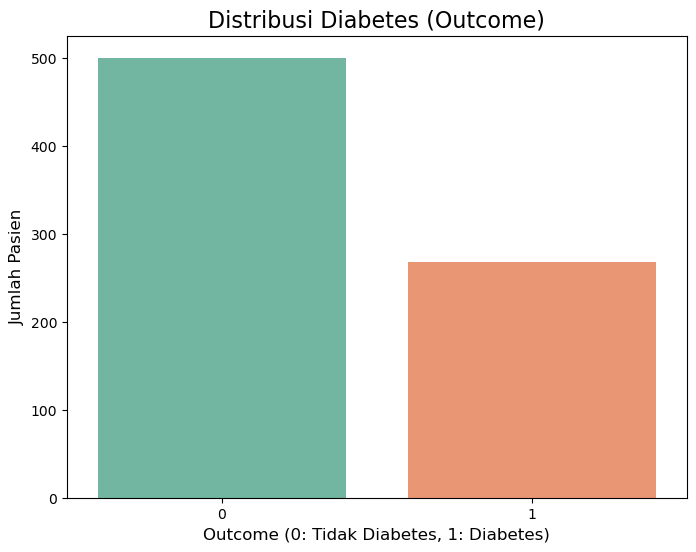

In [15]:
#6
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=df, palette='Set2')
plt.title('Distribusi Diabetes (Outcome)', fontsize=16)
plt.xlabel('Outcome (0: Tidak Diabetes, 1: Diabetes)', fontsize=12)
plt.ylabel('Jumlah Pasien', fontsize=12)
plt.show()


#Conclusion
# Bar chart ini akan menunjukkan distribusi pasien yang didiagnosis dengan diabetes (Outcome = 1) dan yang tidak (Outcome = 0). Ini membantu memahami apakah dataset seimbang atau condong ke salah satu hasil.


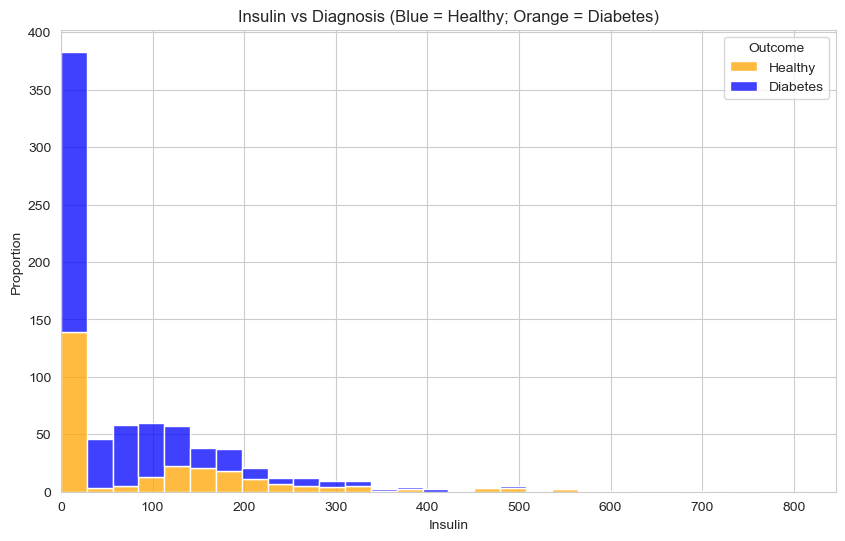

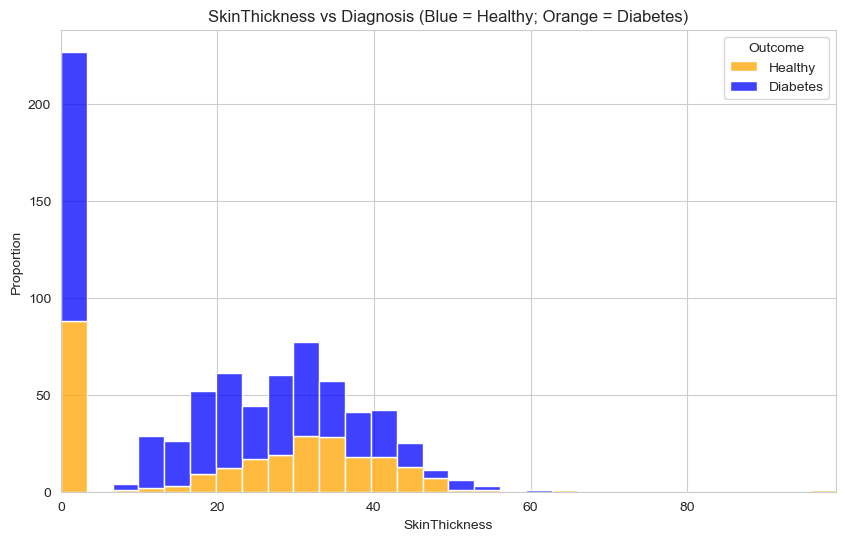

In [44]:
def plotHistogram(values, label, feature, title):
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 6))
    
    sns.histplot(data=values, x=feature, hue=label, multiple="stack", bins=30, kde=False, palette=["blue", "orange"])
    
    plt.xlim(0, values[feature].max())
    plt.xlabel(feature)
    plt.ylabel('Proportion')
    plt.title(title)
    plt.legend(title=label, loc='upper right', labels=['Healthy', 'Diabetes'])
    plt.show()

plotHistogram(df, "Outcome", 'Insulin', 'Insulin vs Diagnosis (Blue = Healthy; Orange = Diabetes)')
plotHistogram(df, "Outcome", 'SkinThickness', 'SkinThickness vs Diagnosis (Blue = Healthy; Orange = Diabetes)')

#Conclusion
#Dari histogram yang ditampilkan untuk variabel Insulin dan SkinThickness berdasarkan diagnosis diabetes, terlihat bahwa kadar insulin cenderung lebih tinggi pada individu yang didiagnosis dengan diabetes dibandingkan dengan individu yang sehat, dengan sejumlah pasien sehat memiliki kadar insulin yang rendah hingga sedang. Untuk variabel SkinThickness, individu yang didiagnosis dengan diabetes menunjukkan proporsi yang lebih tinggi pada ketebalan kulit yang lebih besar, sedangkan sebagian besar individu sehat memiliki ketebalan kulit yang lebih rendah. Visualisasi ini menyoroti perbedaan signifikan dalam kedua fitur ini antara kelompok yang sehat dan yang menderita diabetes, yang dapat menjadi indikator penting dalam upaya diagnosis dan pemantauan penyakit diabetes.

7. Check unique value of our target variable

In [18]:
#7
print(df['Outcome'].value_counts())

#Conclusion
#Mengecek unique value Outcome 

0    500
1    268
Name: Outcome, dtype: int64


8. create a heatmap to see the correlation and explain the conclusion

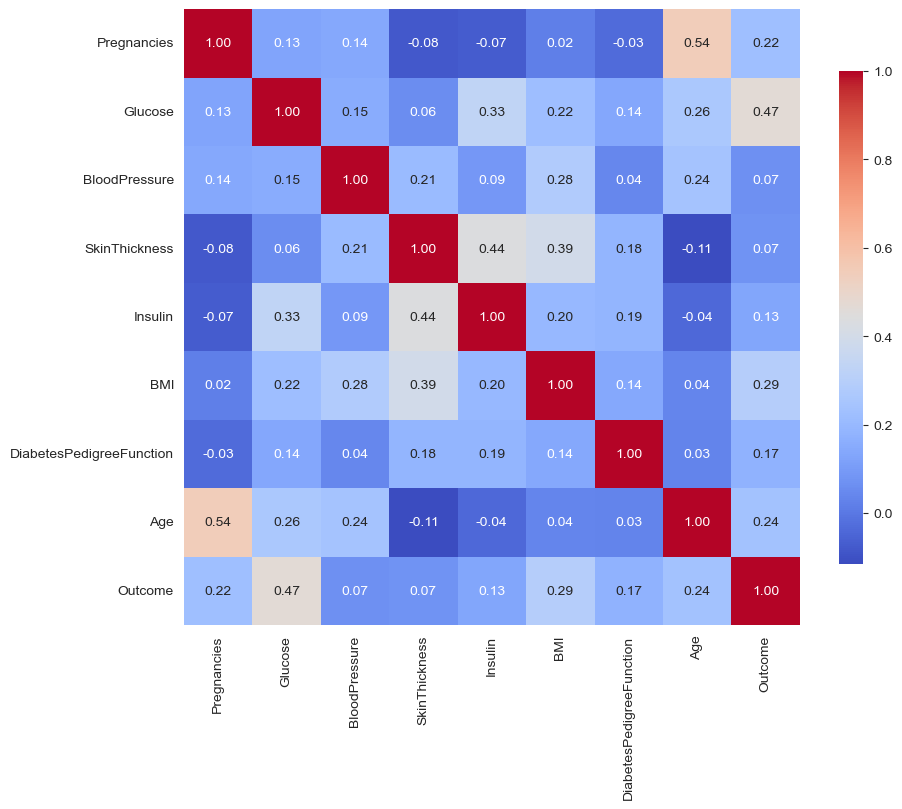

In [57]:
#8
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

plt.show()

#Conclusion
# Berdasarkan heatmap korelasi pada dataset diabetes, bahwa variabel Glucose memiliki korelasi positif yang paling kuat dengan Outcome (sekitar 0.47), menunjukkan bahwa kadar glukosa yang lebih tinggi cenderung terkait dengan risiko diabetes. Selain itu, BMI juga menunjukkan korelasi moderat dengan Outcome (sekitar 0.31), yang berarti indeks massa tubuh yang lebih tinggi juga berhubungan dengan peningkatan risiko diabetes. Sementara itu, variabel seperti BloodPressure dan SkinThickness memiliki korelasi yang sangat lemah dengan Outcome, sehingga pengaruhnya terhadap diabetes cenderung kecil.

## Machine Learning

1. Splitting X and y

In [59]:
#1
x = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']

2. Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

In [60]:
#2
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (614, 8)
X_test shape: (154, 8)


In [61]:
#3
X_train.shape, X_test.shape

((614, 8), (154, 8))

## Desicion Tree


---

a. Defining the model using criterion Entropy and Gini Index <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Check for overfitting and underfitting <br>
e. Visualize decision trees <br>
f. Confusion matrix <br>
g. Classification report <br>
h. Results and conclusion <br>

1. Criterion Entropy

In [48]:
#a
from sklearn.tree import DecisionTreeClassifier

model_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [49]:
#b
y_pred_entropy = model_entropy.predict(X_test)

In [99]:
#c
from sklearn.metrics import accuracy_score

y_pred_entropy = model_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy) * 100

print(f"Model accuracy score with criterion entropy: {accuracy_entropy:.2f}%")


Model accuracy score with criterion entropy: 76.62%


In [51]:
#d
train_accuracy = model_entropy.score(X_train, y_train)
test_accuracy = model_entropy.score(X_test, y_test)

print(f"Training set score: {train_accuracy:.4f}")
print(f"Test set score: {test_accuracy:.4f}")


Training set score: 0.7752
Test set score: 0.7662


[Text(0.5, 0.875, 'x[1] <= 127.5\nentropy = 0.931\nsamples = 614\nvalue = [401, 213]'),
 Text(0.25, 0.625, 'x[7] <= 28.5\nentropy = 0.712\nsamples = 390\nvalue = [314, 76]'),
 Text(0.125, 0.375, 'x[5] <= 30.95\nentropy = 0.391\nsamples = 221\nvalue = [204, 17]'),
 Text(0.0625, 0.125, 'entropy = 0.068\nsamples = 124\nvalue = [123, 1]'),
 Text(0.1875, 0.125, 'entropy = 0.646\nsamples = 97\nvalue = [81, 16]'),
 Text(0.375, 0.375, 'x[5] <= 26.35\nentropy = 0.933\nsamples = 169\nvalue = [110, 59]'),
 Text(0.3125, 0.125, 'entropy = 0.191\nsamples = 34\nvalue = [33, 1]'),
 Text(0.4375, 0.125, 'entropy = 0.986\nsamples = 135\nvalue = [77, 58]'),
 Text(0.75, 0.625, 'x[5] <= 29.95\nentropy = 0.964\nsamples = 224\nvalue = [87, 137]'),
 Text(0.625, 0.375, 'x[1] <= 145.5\nentropy = 0.895\nsamples = 61\nvalue = [42, 19]'),
 Text(0.5625, 0.125, 'entropy = 0.533\nsamples = 33\nvalue = [29, 4]'),
 Text(0.6875, 0.125, 'entropy = 0.996\nsamples = 28\nvalue = [13, 15]'),
 Text(0.875, 0.375, 'x[1] <= 165.5

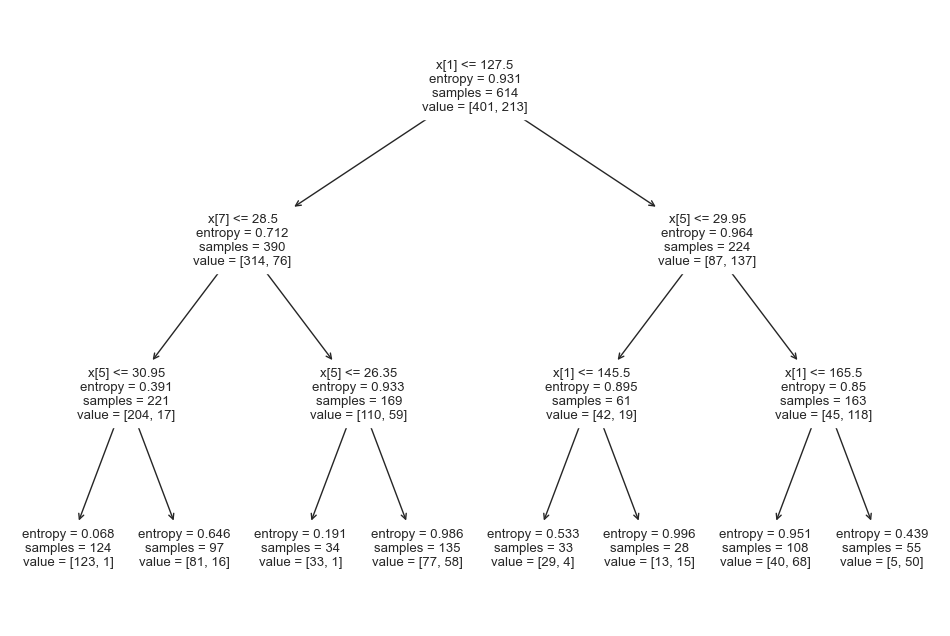

In [71]:
#e
from sklearn import tree

plt.figure(figsize=(12,8))
tree.plot_tree(model_entropy.fit(X_train,y_train))


2. Criterion Gini index

In [33]:
#a
from sklearn.tree import DecisionTreeClassifier

model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
model_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=0)

In [34]:
#b
y_pred_gini = model_gini.predict(X_test)

In [98]:
#c
from sklearn.metrics import accuracy_score

y_pred_gini = model_gini.predict(X_test)
accuracy_gini = accuracy_score(y_test, y_pred_gini) * 100

print(f"Model accuracy score with criterion gini index: {accuracy_gini:.2f}%")

Model accuracy score with criterion gini index: 75.97%


In [36]:
#d
train_accuracy = model_gini.score(X_train, y_train)
test_accuracy = model_gini.score(X_test, y_test)

print(f"Training set score: {train_accuracy:.4f}")
print(f"Test set score: {test_accuracy:.4f}")

Training set score: 0.7769
Test set score: 0.7597


[Text(0.5, 0.875, 'x[1] <= 127.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(0.25, 0.625, 'x[7] <= 28.5\ngini = 0.314\nsamples = 390\nvalue = [314, 76]'),
 Text(0.125, 0.375, 'x[5] <= 30.95\ngini = 0.142\nsamples = 221\nvalue = [204, 17]'),
 Text(0.0625, 0.125, 'gini = 0.016\nsamples = 124\nvalue = [123, 1]'),
 Text(0.1875, 0.125, 'gini = 0.275\nsamples = 97\nvalue = [81, 16]'),
 Text(0.375, 0.375, 'x[5] <= 26.35\ngini = 0.454\nsamples = 169\nvalue = [110, 59]'),
 Text(0.3125, 0.125, 'gini = 0.057\nsamples = 34\nvalue = [33, 1]'),
 Text(0.4375, 0.125, 'gini = 0.49\nsamples = 135\nvalue = [77, 58]'),
 Text(0.75, 0.625, 'x[5] <= 29.95\ngini = 0.475\nsamples = 224\nvalue = [87, 137]'),
 Text(0.625, 0.375, 'x[1] <= 146.5\ngini = 0.429\nsamples = 61\nvalue = [42, 19]'),
 Text(0.5625, 0.125, 'gini = 0.239\nsamples = 36\nvalue = [31, 5]'),
 Text(0.6875, 0.125, 'gini = 0.493\nsamples = 25\nvalue = [11, 14]'),
 Text(0.875, 0.375, 'x[1] <= 165.5\ngini = 0.4\nsamples = 163\nvalue = 

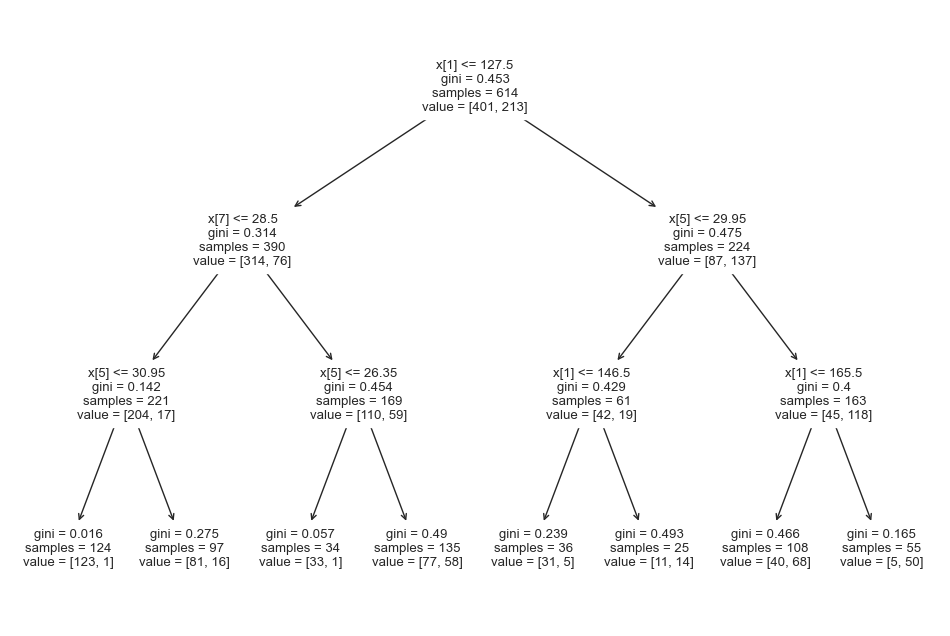

In [64]:
#e
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
tree.plot_tree(model_gini.fit(X_train,y_train))

3. Confusion matrix and classification report of criterion Entropy and Gini index

In [73]:
#f
from sklearn.metrics import confusion_matrix

cm_entropy = confusion_matrix(y_test, y_pred_entropy)
print("Confusion Matrix Entropy:\n", cm_entropy)

cm_gini = confusion_matrix(y_test, y_pred_gini)
print("Confusion Matrix Gini Index:\n", cm_gini)

#Conclusion
#menampilkan hasil Confusion Matrix gini index

Confusion Matrix Entropy:
 [[83 16]
 [20 35]]
Confusion Matrix Gini Index:
 [[83 16]
 [21 34]]


In [92]:
#g
from sklearn.metrics import classification_report

print("Classification Report (Entropy):\n")
print(classification_report(y_test, y_pred_entropy))

print("Classification Report (Gini Index):\n")
print(classification_report(y_test, y_pred_gini))

#Conclusion
#Dari hasil model menggunakan Entropy dan Gini Index, kedua model Decision Tree memberikan performa yang mirip, dengan akurasi sekitar 76-77%. Model Entropy sedikit lebih baik dalam mendeteksi kelas 1 (positif diabetes), dengan recall 0.64 dan f1-score 0.66, dibandingkan Gini Index yang memiliki recall 0.62 dan f1-score 0.65. Secara keseluruhan, model ini lebih efektif mendeteksi kelas 0 (negatif diabetes) dengan presisi dan recall di atas 80% untuk kedua metode.

Classification Report (Entropy):

              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154

Classification Report (Gini Index):

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



## Naive Bayes


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

library : from sklearn.naive_bayes import GaussianNB

In [39]:
#a
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [40]:
#b
y_pred_nb = nb.predict(X_test)

#Conclusion
#menampilkan predict  X_test menggunakan the Naive Bayes Classifier model.

In [97]:
#c
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_percentage = accuracy_nb * 100
print(f"Model accuracy score: {accuracy_percentage:.2f}%")

#d
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print(f"Confusion Matrix:\n", conf_matrix_nb)

#Conclusion
#untuk menampilkan model accuracy dan confusion matrix

Model accuracy score: 76.62%
Confusion Matrix:
 [[79 20]
 [16 39]]


In [55]:
#e
class_report_nb = classification_report(y_test, y_pred_nb)
print("Classification Report:\n", class_report_nb)

#Conclusion
#Classification report dari Naive Bayes Classifier yang menunjukkan nilai presisi, recall, f1-score, serta jumlah data (support) dengan akurasi 77%.

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



## K-Nearest Neighbors (KNN)

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [100]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [82]:
y_pred = knn.predict(X_test_scaled)

In [86]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print(f'Accuracy model: {accuracy_percentage:.2f}%')


Accuracy model: 69.48%


In [96]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[79 20]
 [27 28]]


In [85]:
print(classification_report(y_test, y_pred))
print("Classification Report (KNN):\n")

#Conclusion
#Dari hasil evaluasi model, akurasi keseluruhan adalah 69%. Model ini memiliki performa yang lebih baik dalam mendeteksi kelas 0 (negatif diabetes) dengan presisi 0.75 dan recall 0.80, dibandingkan kelas 1 (positif diabetes) yang memiliki presisi 0.58 dan recall 0.51. Dengan f1-score lebih tinggi pada kelas 0 (0.77) dibandingkan kelas 1 (0.54), model ini lebih efektif dalam mengidentifikasi kasus negatif diabetes daripada positif.

              precision    recall  f1-score   support

           0       0.75      0.80      0.77        99
           1       0.58      0.51      0.54        55

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.66       154
weighted avg       0.69      0.69      0.69       154

Classification Report (KNN):

